# SIMPLE EDA USING TITANIC DATASET
Created by: Yusuf Arico Pratama

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# rcParams = mengubah peraturan default matplotlib
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv('titanic/train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# Separate Column
numericals = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categoricals = ['Sex', 'Embarked']

## Descriptive Statistics
Ringkasan statistik dari setiap kolom di dataset yang dapat memberikan gambaran besar keadaan data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Insight:** <br>
- Total maksimum data sebanyak 891 baris
- Terdapat nilai null pada kolom: age, cabin, dan embarked

In [5]:
# memisahkan data types numerical
num_df = df.select_dtypes(['int64', 'float64'])
numerical = num_df.columns
numerical

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [25]:
numerical = numerical.drop('PassengerId')

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
cat_df = df.select_dtypes('object')
categorical = cat_df.columns
categorical

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
df[categoricals].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [10]:
categorical = categorical.drop(['Name', 'Ticket', 'Cabin'])

## Univariate Analysis
Analisis setiap kolom secara terpisah, melihat distribusi nilai secara detail

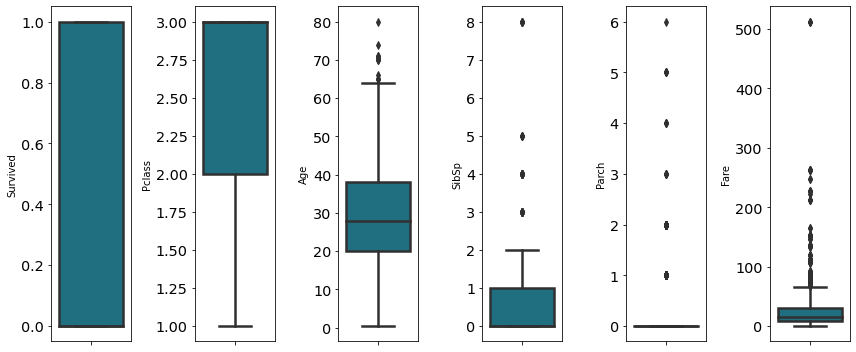

In [18]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='#107991', orient='v')
    plt.tight_layout()

**Insight:** <br>
- Terdapat outlier pada kolom SibSp dan Fare
- Outlier dapat diketahui dari jarak 1,5 x IQR
- Kolom age memiliki jumlah kebanyakan data pada range 20-40 tahun, namun ada juga beberapa data disekitar range tersebut.

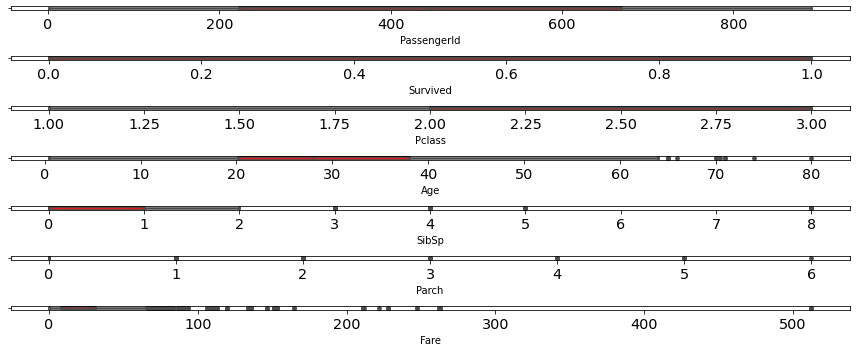

In [22]:
features = numerical
for i in range(0, len(features)):
    plt.subplot(len(features),1 , i+1)
    sns.boxplot(x=df[features[i]], color='red', orient='h')
    plt.tight_layout()

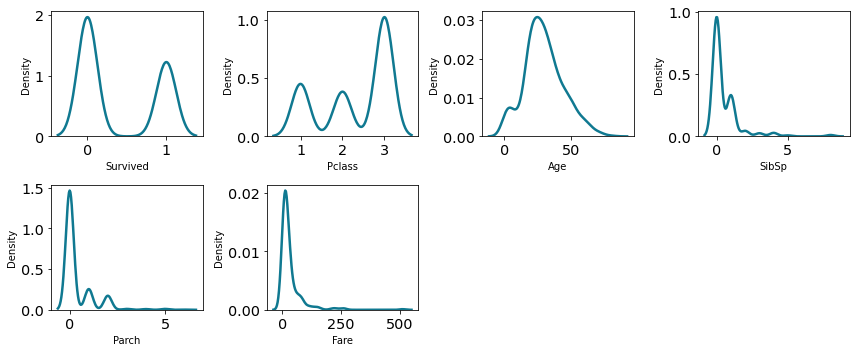

In [17]:
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)  # 2x4=8 > len(numerical)=7
    sns.kdeplot(x=df[features[i]], color='#107991')
    plt.xlabel(features[i])
    plt.tight_layout()

**Insight:** <br>
- Distribusi pada kolom survived dan pclass termasuk kedalam bentuk bimodal
- Kolom Age, SibSP, Parch, dan Fare memiliki distribusi negative skewed

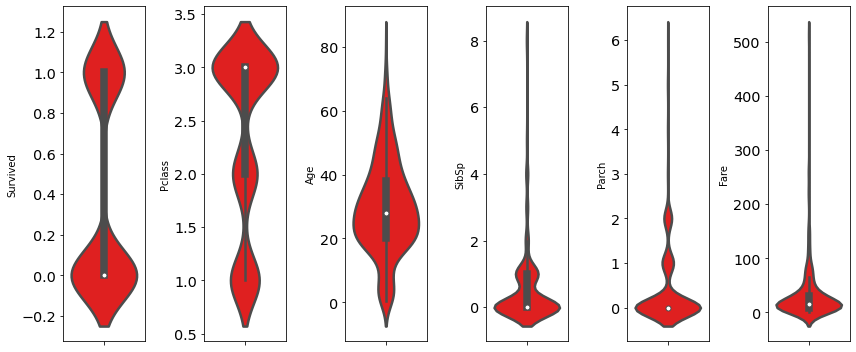

In [28]:
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=df[features[i]], color='red')
    plt.tight_layout()

**Insight:** <br>
- violinplot merupakan gabungan boxplot dan distribution plot(kde)

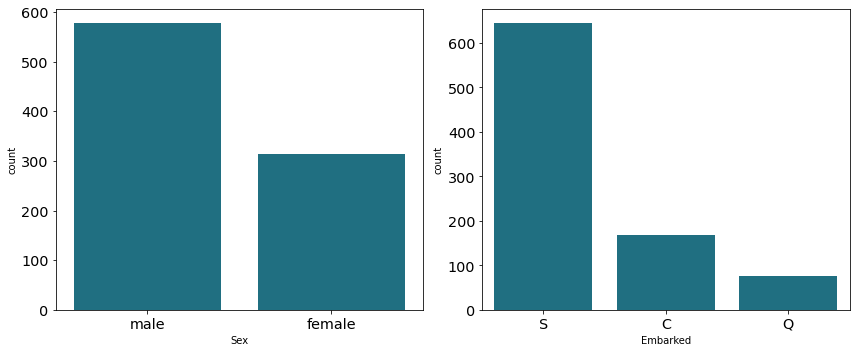

In [19]:
features1 = categoricals
for i in range(0, len(features1)):
    plt.subplot(1, len(features1), i+1)
    sns.countplot(x=df[features1[i]], color='#107991')
    plt.tight_layout()

**Insight:** <br>
- Penumpang didominasi oleh jenis kelamin laki-laki dengan jumlah sekitar 2x lebih banyak dari jumlah penumpang perempuan.
- Embarked lebih banyak dari kelompok S dan paling sedikit dari kelompok Q
- Sebaran kategori yang memiliki ketimpangan data, akan menjadi sulit untuk menjadi fitur learning pada machine learning..

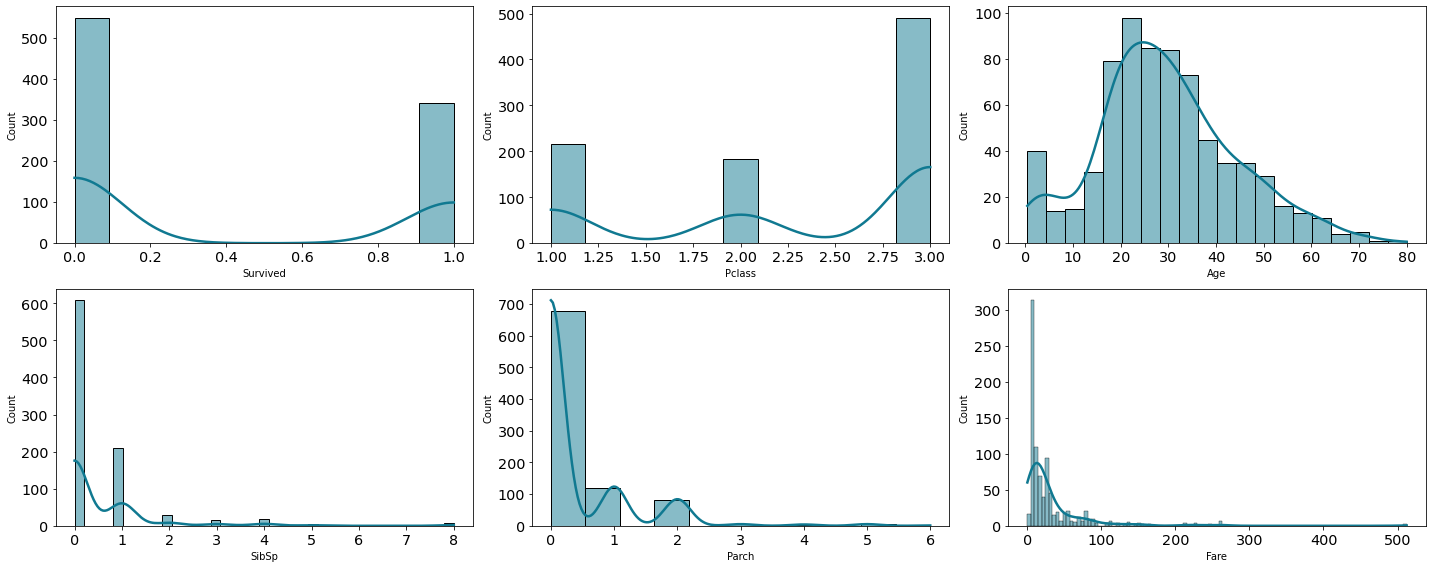

In [32]:
features2 = numericals
plt.figure(figsize=(20,8))
for i in range(0, len(features2)):
    plt.subplot(2, 3, i+1)
    # plt.subplot(1, len(features2), i+1)
    sns.histplot(x=df[features2[i]], color='#107991', kde=True)
    plt.tight_layout()

## Multivariate Analysis
Analisis beberapa kolom sekaligus untuk mencari hubungan antar kolom.

<Figure size 720x504 with 0 Axes>

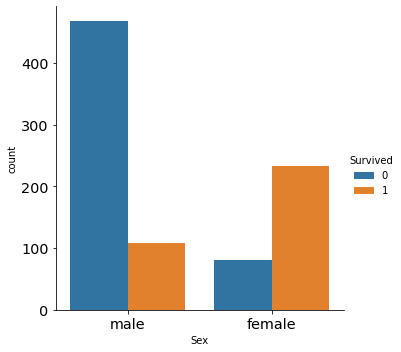

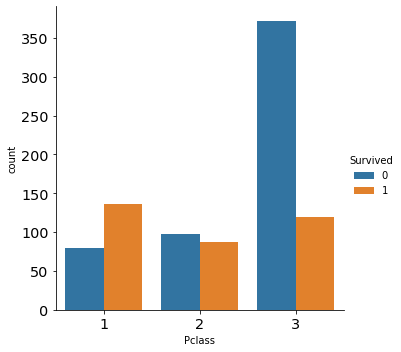

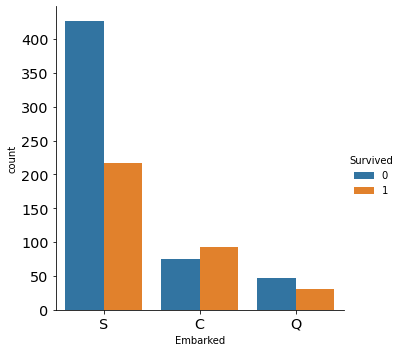

In [53]:
# fig, axs = plt.subplots(ncols=2)
plt.figure(figsize=(10,7))
sns.catplot(x='Sex',data=df,kind='count',hue='Survived') #observing survival based on gender
sns.catplot(x='Pclass',data=df,kind='count',hue='Survived') #observing survival based on Passenger class
sns.catplot(x='Embarked',data=df,kind='count',hue='Survived')#observing survival based on Embarked class

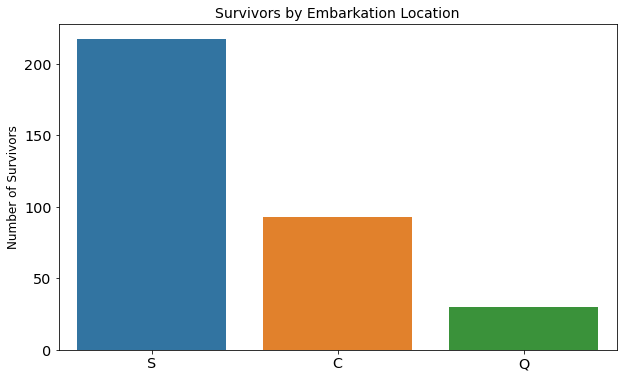

In [66]:
# Count the number of survivors based on embarkation location
survivors_embark = df[df['Survived'] == 1]['Embarked'].value_counts()

# Create a bar plot
# sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x=survivors_embark.index, y=survivors_embark.values)
plt.title('Survivors by Embarkation Location', fontsize=14)
# plt.xlabel('Embarkation Location', fontsize=12)
plt.ylabel('Number of Survivors', fontsize=12)
plt.show()

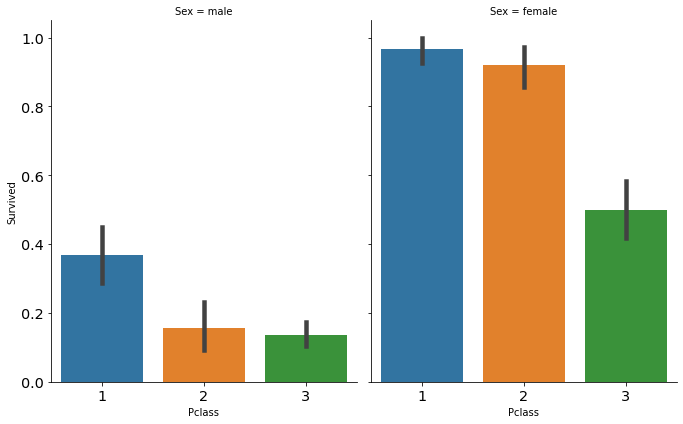

In [65]:
# plt.figure(figsize=(15,8))
sns.catplot(
    data=df, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=6, aspect=.8,
)

C:\Users\yusuf arico\anaconda3\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


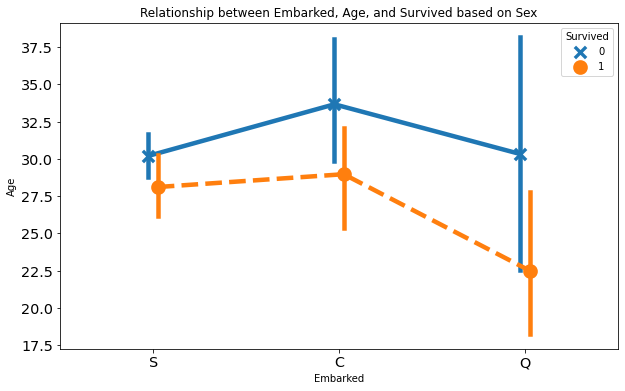

In [70]:
plt.figure(figsize=(10,6))
sns.pointplot(x='Embarked', y='Age', hue='Survived', data=df, dodge=True, markers=['x', 'o'], linestyles=['-', '--'])
plt.title('Relationship between Embarked, Age, and Survived based on Sex')
plt.show()

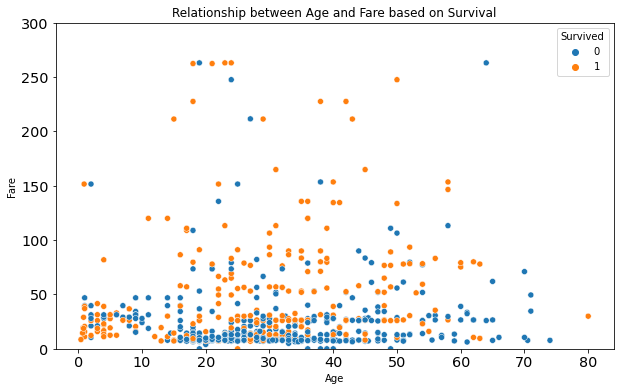

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
plt.title('Relationship between Age and Fare based on Survival')
plt.ylim(0,300)
plt.show()

<AxesSubplot:>

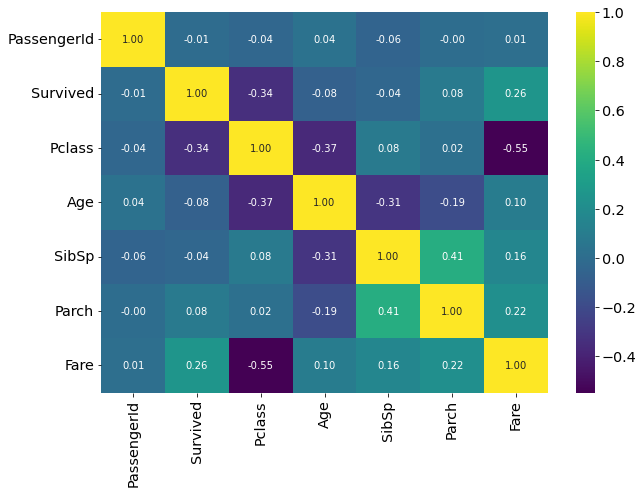

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='viridis', annot=True, fmt='.2f')

**Insight:** <br>
- Terdapat korelasi negatif antara PClass dan Fare

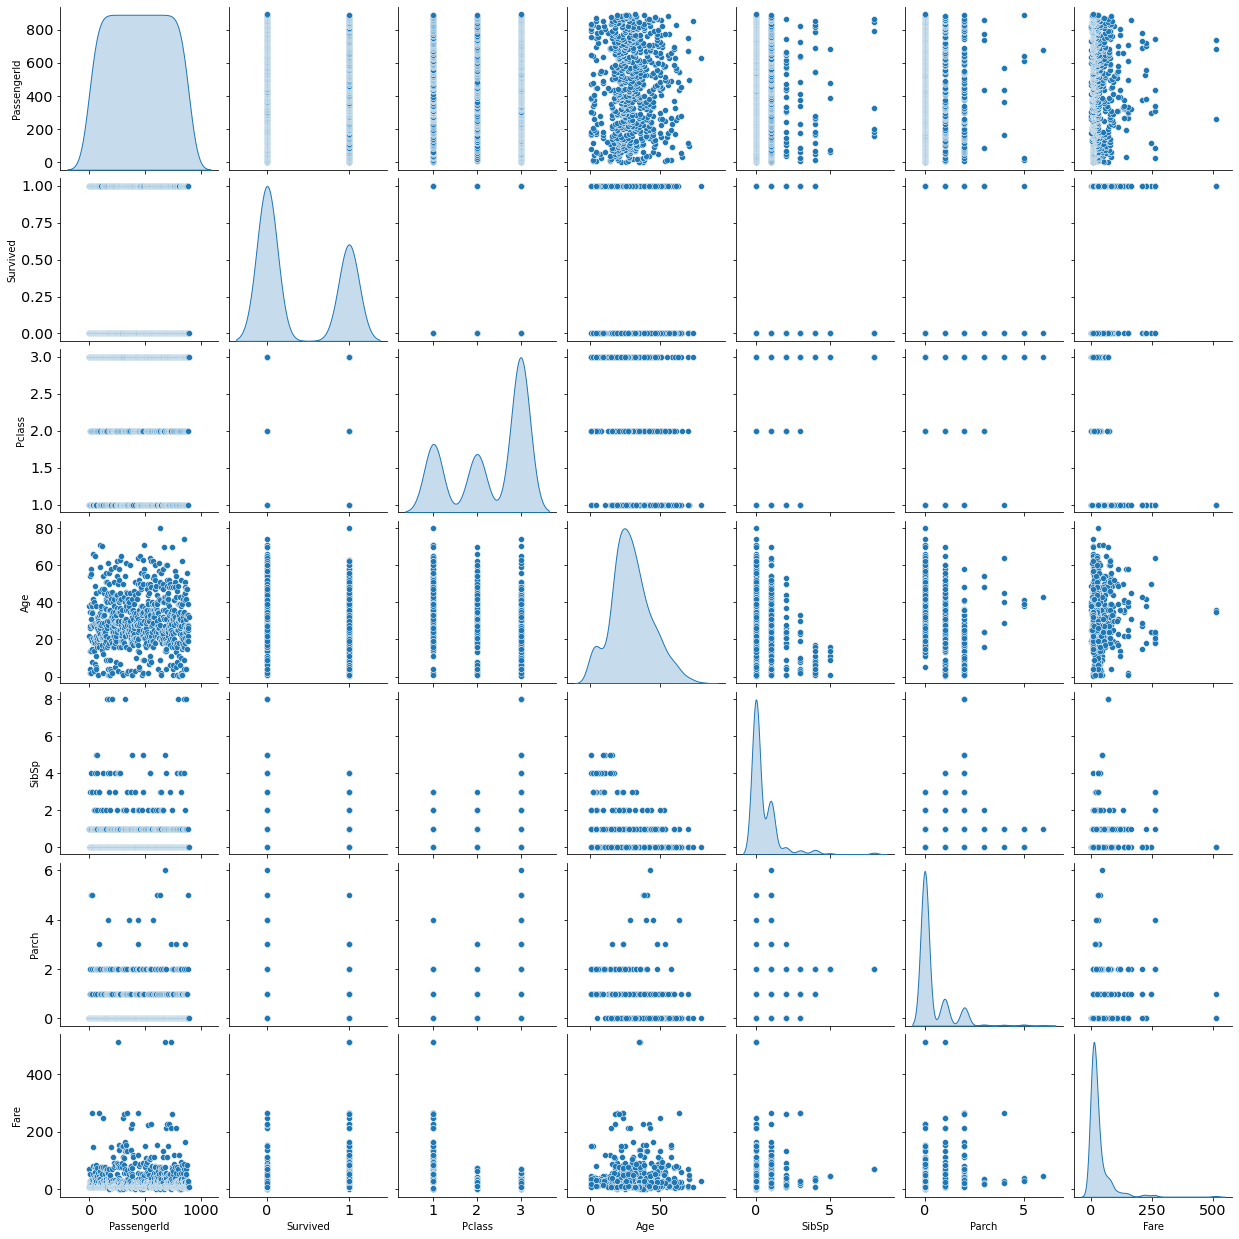

In [38]:
sns.pairplot(df, diag_kind='kde')

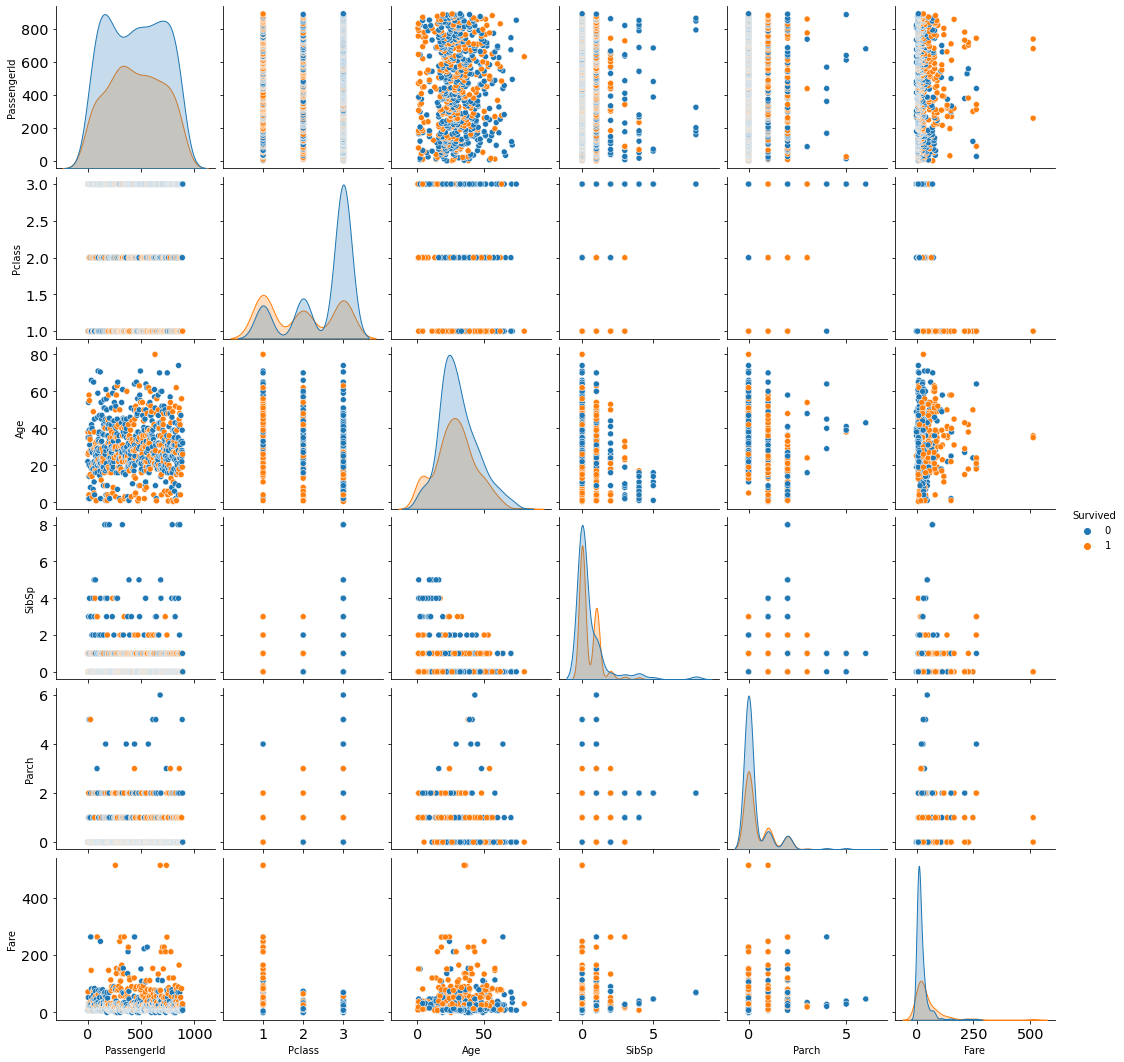

In [39]:
sns.pairplot(df, diag_kind='kde', hue='Survived')

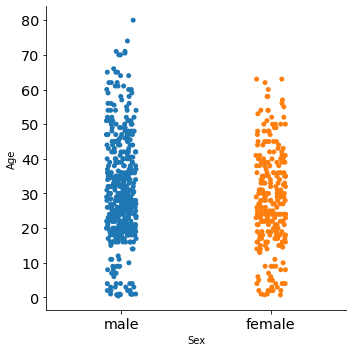

In [42]:
sns.catplot(data=df, x='Sex', y='Age')

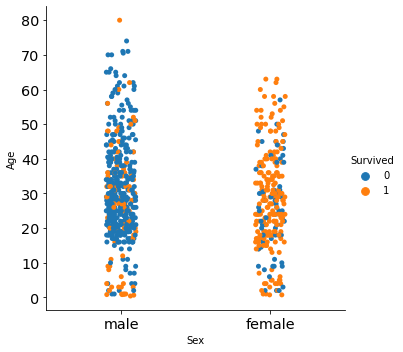

In [47]:
sns.catplot(data=df, x='Sex', y='Age', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

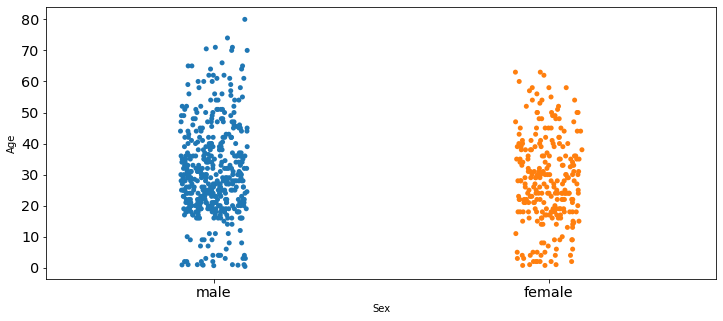

In [41]:
sns.stripplot(data=df, x='Sex', y='Age')